# Step-1:Business Problem Understanding


**sample project**
* Identify relationship between total advertising spend and sales?
* Our next ad campaign will have a total spend of $200,000.How many units do we expect to sell as a result of this ?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Step-2: Data Understanding

**2.1: Data Collection**

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()            # total information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


**If someone was to spend a total of $200,000, what would the expected sales be ?**

* We have simplified this quite  a bit by combining all the feature into 'total spend'  

In [4]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [5]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)  #if true is there save original
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# Step-3: Data Preprocessing
Data processing occurs when data is collected and translated into usable information. 

**3.1:Explotory Data Analysis**

* On the basis of this data,how should you spend advertising money in the feature ?These general Questions might lead you to more specific questions:

* 1. Is there a relationship between ads and sales ?
* 2. How strong is that relationship ?
* 3. Given ad spending,can sales be predicted ?

In [6]:
df.describe()
#The describe() method returns description of the data in the DataFrame.
#If the DataFrame contains numerical data, the description contains these information for each column:
  #count - The number of not-empty values.
  # mean - The average (mean) value.

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


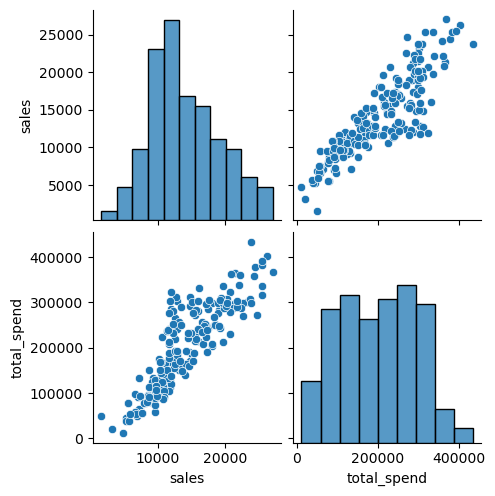

In [7]:
sns.pairplot(df) 
plt.show()
# pairplot(histo+scatter):
# Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
#Plot pairwise relationships in a data-set. 
#Pairplot is a module of seaborn library .
#It provides a high-level interface for drawing attractive and informative statistical graphics.

In [8]:
df.corr()   #correlation:-The corr() method finds the correlation of each column in a DataFrame.

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


**Step-3.2: Data cleaning**:-
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [9]:
df.isnull().sum()  #The function dataframe. isnull(). sum() returns the number of missing values in the dataset.

sales          0
total_spend    0
dtype: int64

**Step-3.3: Data Wrangling:**

* Data wrangling is the process of removing errors and combining complex data sets to make them more accessible and easier to analyze.
* No encoding is reqired.
* Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

 **Step-3.4: Tain-test Split**
    
    The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

In [10]:
#create X and y
# taking only one variable for now
X=df.drop(columns='sales')
y=df['sales']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65)

#Scikit-learn is probably the most useful library for machine learning in Python.
#The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

# step-4: Modeling

Machine learn data as per algorithm is called modeling. 
Algorithm:Way of training
Modelling with default parameters

In [12]:
#import
from sklearn.linear_model import LinearRegression  # machine learning algorithm

In [13]:
# save the model
model=LinearRegression() # model is a variable

In [14]:
#fit
model.fit(X_train,y_train) #fit:(calculate):-fit function in ML, that is used for training of model using data examp (doubt)

LinearRegression()

In [15]:
#print intercept(B0) #ŷ=B0+B1x
model.intercept_  #The intercept (sometimes called the “constant”) in a regression model represents the mean value of the response variable when all of the predictor variables in the model are equal to zero

4359.4787264212155

In [16]:
#print coef(B1):cofficient always same & Also called slop(y=mx+c)
model.coef_   

array([0.04832985])

**Predictoin**
y valu machin will predict

In [17]:
train_predictions=model.predict(X_train)

In [18]:
test_predictions=model.predict(X_test)

# step-5:Evaluation

Check how much machine has learn.

In [19]:
# not import
from sklearn.metrics import mean_absolute_error
print("MAE for test data: ",mean_absolute_error(y_test,test_predictions))
print("MAE for train data: ",mean_absolute_error(y_train,train_predictions))

MAE for test data:  1657.4223330982957
MAE for train data:  2024.497912051795


In [20]:
from sklearn.metrics import mean_squared_error
print("MSE for test data:",mean_squared_error(y_test,test_predictions))
print("MSE for train data:",mean_squared_error(y_train,train_predictions))

MSE for test data: 4929076.177299121
MSE for train data: 7136863.730968645


In [21]:
print("RMSE for test data:",np.sqrt(mean_squared_error(y_test,test_predictions)))
print("RMSE for train data:",np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data: 2220.1522869612168
RMSE for train data: 2671.4909191252445


In [22]:
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,test_predictions))
print("R2 for train data:",r2_score(y_train,train_predictions))

R2 for test data: 0.7965325128176913
R2 for train data: 0.7416634436343958


In [23]:
# Test R-Square
model.score(X_test,y_test)


0.7965325128176913

In [24]:
#Train R-Square
model.score(X_train,y_train)

0.7416634436343958

**Checklist**

* 1.Check whether model has overfiting or underfiting problem
* 2.Is Test Accuracy=Cross validation Score
* 3.Check Assumptions(if it Linear Regression)
* 4.Check model meets the business problem reqirments

In [25]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score: 0.7433783178555419


# Check for Assumptions**

* 1. Linearity off Error

In [26]:
test_res=y_test-test_predictions

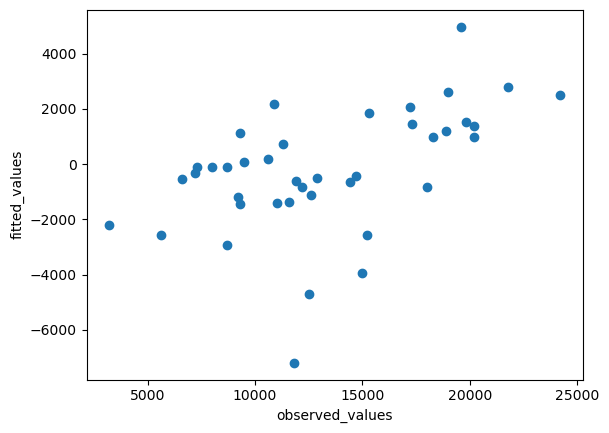

In [27]:
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

**2.Normality of Errors**

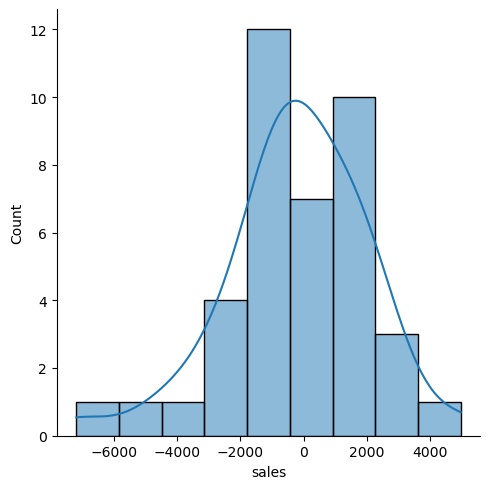

In [28]:
sns.displot(test_res,kde=True)
#plt.hist(test_result)
plt.show()

**3.Equal variance of Errors(Homoscadesicity)**

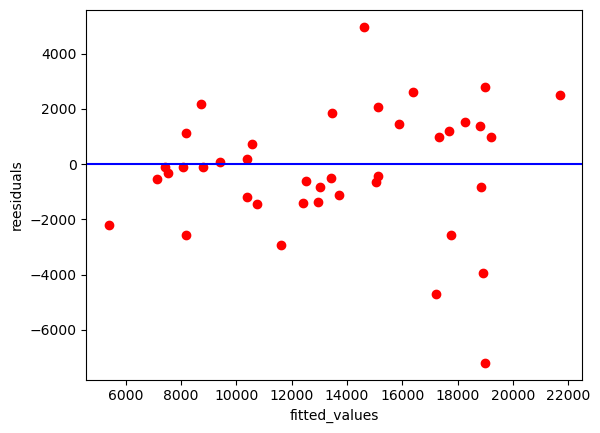

In [29]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('reesiduals')
plt.show()

**Variable significance**

In [30]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           5.06e-62
Time:                        16:02:09   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step-6: Final Inferences
* Our next ad campaign will  have a total spend of 200k on ads,how many units could we expect to sell as a result of this?

In [31]:
#use the model to make prediction a new value
model.predict([[321400]])

G:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19892.69407476])

**Save a model**

In [32]:
from joblib import dump
dump(model,'sales_model.joblib')

['sales_model.joblib']

**Load a Model**

In [33]:
from joblib import load
loaded_model=load('sales_model.joblib')
loaded_model.predict([[200000]])

G:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14025.44969614])